## Define activation function

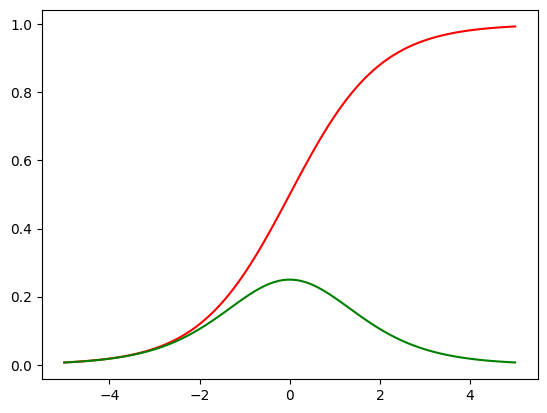

In [241]:
from matplotlib import pyplot as plt
import numpy as np
fig = plt.figure()

def g(x):
    return 1 / (1 + np.exp(-x))
def dg(x):
    g_ = g(x)
    return g_*(1-g_)

x = np.linspace(-5,5,100)
y = g(x)

plt.plot(x,y, 'r')

x = np.linspace(-5,5,100)
y = dg(x)

ax = plt.gca()
ax.set_facecolor('w')
plt.plot(x,y, 'g')


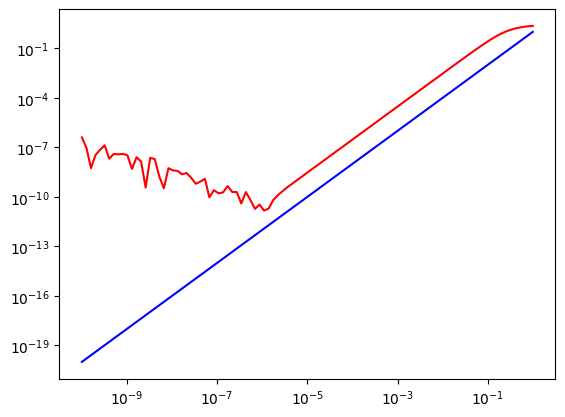

In [242]:
x = np.random.rand(700)
theta = np.zeros_like(x)

def h(x, theta):
    return g( np.dot(theta,x))

def dh(x, theta):
    return dg(np.dot(theta,x))*x

dtheta=np.random.rand(700)
dtheta/=np.sqrt(np.dot(dtheta,dtheta))

def error(x,theta,dtheta,eps):
    return np.abs(h(x,theta+eps*dtheta)-h(x,theta)-eps*np.dot(dh(x,theta),dtheta))/eps

epsvals = np.logspace(-10,0,100)
yE = np.zeros(100)
for i,val in enumerate(epsvals):
    yE[i]= error(x,theta,dtheta,val)
ax= fig.axes
# ax.set_yscale('log')
# ax.set_xscale('log')
plt.loglog(epsvals,yE, 'r')
plt.loglog(epsvals,epsvals**2, 'b')
# plt.plot(epsvals,yE, 'r')
# plt.plot(epsvals,epsvals, 'b')
# ax.set_yscale('log')

In [243]:
numPixel = 28*28
sizeMiddleLayer= 60
outPutLayerSize= 10
x=np.random.rand(numPixel)
theta1 =np.random.rand(sizeMiddleLayer,numPixel+1)/1000
theta2 =np.random.rand(outPutLayerSize,sizeMiddleLayer+1)/1000

## Forward sweep

In [244]:
z1 = x
a1 = np.hstack([1, x]) # size numPixel+1
# print(a1)

z2 = (theta1@a1) # (sizeMiddleLayer,numPixel+1) x numPixel+1 = sizeMiddleLayer
#print(z2)
a2 = np.hstack([1, g(z2)]) # sizeMiddleLayer (+1) = sizeMiddleLayer+1
#print("a2: ",a2,np.shape(a2))
assert np.shape(a2)[0]==sizeMiddleLayer+1

In [245]:
z3 = theta2@a2 # (outPutLayerSize,sizeMiddleLayer+1) x sizeMiddleLayer+1 = outPutLayerSize
a3 = g(z3)
assert np.shape(a3)[0]==outPutLayerSize

### Backpropagation

In [246]:
y= np.ones(outPutLayerSize)
delta3 = a3-y
assert np.shape(delta3)[0]==outPutLayerSize


delta2 = (np.transpose(theta2)@delta3)[1:] * dg(z2) # (sizeMiddleLayer+1 x outPutLayerSize) * outPutLayerSize .* sizeMiddleLayer   = sizeMiddleLayer+1
print(delta2)

[-0.00073305 -0.00079158 -0.00075788 -0.00064992 -0.00062845 -0.00061414
 -0.00068344 -0.00059658 -0.00062597 -0.00064689 -0.00066455 -0.00053245
 -0.00060925 -0.00052233 -0.00057856 -0.00045026 -0.00075924 -0.00050244
 -0.00055604 -0.00056109 -0.00067815 -0.00082693 -0.00061372 -0.00045118
 -0.0007013  -0.00066868 -0.00076646 -0.00066725 -0.00061492 -0.00058413
 -0.0004842  -0.00057334 -0.00061987 -0.00073501 -0.0006698  -0.00050326
 -0.0006037  -0.00062534 -0.00080771 -0.00044228 -0.00069087 -0.00058157
 -0.00042579 -0.00073059 -0.00058598 -0.00071841 -0.00064508 -0.00064645
 -0.00068259 -0.0005164  -0.00052492 -0.00053489 -0.00088229 -0.00063024
 -0.00059523 -0.00046122 -0.00069978 -0.00052993 -0.00068229 -0.00069221]


In [247]:
# Delta = np.zeros(outPutLayerSize)

a1=np.reshape(a1,(len(a1),1))
a2=np.reshape(a2,(len(a2),1))
print("Shape a1: ",np.shape(a1))
print("Shape a2: ",np.shape(a2))

delta2=np.reshape(delta2,(len(delta2),1))
delta3=np.reshape(delta3,(len(delta3),1))
print("Shape delta2: ",np.shape(delta2))
print("Shape delta3: ",np.shape(delta3))
Delta1 = delta2@np.transpose(a1)
Delta2 = delta3@np.transpose(a2)
print("Shape Delta1: ",np.shape(Delta1))
print("Shape Delta2: ",np.shape(Delta2))
gradJdtheta1 = Delta1/numPixel
gradJdtheta2 = Delta2/numPixel

Shape a1:  (785, 1)
Shape a2:  (61, 1)
Shape delta2:  (60, 1)
Shape delta3:  (10, 1)
Shape Delta1:  (60, 785)
Shape Delta2:  (10, 61)


In [265]:
numPixel = 28*28
sizeMiddleLayer= 60
outPutLayerSize= 10
x=np.random.rand(numPixel)
theta1 =np.random.rand(sizeMiddleLayer,numPixel+1)/1000
theta2 =np.random.rand(outPutLayerSize,sizeMiddleLayer+1)/1000

ndata=1
Y = np.ones((ndata, outPutLayerSize))
X = np.random.rand(ndata, 28 * 28)

thetaArray = [theta1, theta2]
numberOfLayers=3

def J(Y_v,X_v,thetaArray_):
    res = 0
    dJ = [np.zeros((sizeMiddleLayer*(numPixel+1),1)) , np.zeros((outPutLayerSize*(sizeMiddleLayer+1),1))]

    for i in range(ndata):
        x = X_v[i,:]
        y = Y_v[i,:]
        a = [np.hstack([1, x])]
        z=[None]
        for l in range(numberOfLayers-1):
            # Forward
            z.append((thetaArray_[l] @ a[l]))
            a.append(np.hstack([1, g(z[-1])]))

        delta3 = a[-1][1:]-y

        # for l in reversed(range(numberOfLayers-1)): #backpropagation
        delta2 = (np.transpose(thetaArray_[1])@delta3)[1:] * dg(z[1]) # (sizeMiddleLayer+1 x outPutLayerSize) * outPutLayerSize .* sizeMiddleLayer   = sizeMiddleLayer+1
        a1= a[0]
        a2= a[1]
        a1=np.reshape(a1,(len(a1),1))
        a2=np.reshape(a2,(len(a2),1))
        delta2=np.reshape(delta2,(len(delta2),1))
        delta3=np.reshape(delta3,(len(delta3),1))

        Delta1 = delta2@np.transpose(a1)
        Delta2 = delta3@np.transpose(a2)

        gradJdtheta1 = Delta1/ndata
        gradJdtheta2 = Delta2/ndata

        dJ0 = np.reshape(np.ndarray.flatten(gradJdtheta1),(len(np.ndarray.flatten(gradJdtheta1)),1))
        dJ[0] +=dJ0/ndata
        dJ1 = np.reshape(np.ndarray.flatten(gradJdtheta2),(len(np.ndarray.flatten(gradJdtheta2)),1))
        dJ[1] +=dJ1/ndata
        finalCountdowna= a[-1][1:]
        for k in range(outPutLayerSize):
            h_ = finalCountdowna[k] # (theta_l_ij
            logh = np.log(h_)
            Yik= Y_v[i, k]
            # print("h: ",h_)
            res += -Yik * logh - (1 - Yik) * np.log(1-h_)
    return res/ndata, dJ

Jval,_ = J(Y,X,thetaArray)
print(Jval)


6.841902419637706


In [266]:
def error(Y_v,X_v,thetaArray_,dtheta,eps):
    Je, dJe = J(Y_v,X_v,thetaArray_)
    thetaArray_perturbed = thetaArray_
    thetaArray_perturbed[0] += dtheta[0]*eps
    thetaArray_perturbed[1] += dtheta[1]*eps
    Jepeps, _ = J(Y_v,X_v,thetaArray_perturbed)
    grad=0
    for l in range(numberOfLayers-1):
        grad+=eps*np.dot(np.ndarray.flatten(dtheta[l]),dJe[l])
    return np.abs(Jepeps-Je-grad)/eps

In [267]:
epsvals = np.logspace(-10,0,100)
dthetaRand = thetaArray/1000
dthetaRand[0] = np.random.random(np.shape(dthetaRand[0]))
dthetaRand[0]/=np.linalg.norm(dthetaRand[0])
dthetaRand[1] = np.random.random(np.shape(dthetaRand[1]))
dthetaRand[1]/=np.linalg.norm(dthetaRand[1])

for i,val in enumerate(epsvals):
    yE[i]= error(Y,X,thetaArray,dthetaRand,val)
ax= fig.axes
# ax.set_yscale('log')
# ax.set_xscale('log')
plt.loglog(epsvals,yE, 'r')
plt.loglog(epsvals,epsvals**2, 'b')


TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [278]:
epsvals = np.logspace(-5,0,10)
JvalA = []
# print(dtheta)
# print(thetaArray)
for i,val in enumerate(epsvals):
    # print(i,val)
    thetaArray_perturbed = thetaArray
    thetaArray_perturbed[0]/=1000
    thetaArray_perturbed[1]/=1000
    thetaArray_perturbed[0] += dtheta[0]*val
    thetaArray_perturbed[1] += dtheta[1]*val
    Jval, grad = J(Y,X,thetaArray_perturbed)
    JvalA.append(Jval)
print(JvalA)
import scipy

theta1 =np.random.rand(sizeMiddleLayer,numPixel+1)/1000
theta2 =np.random.rand(outPutLayerSize,sizeMiddleLayer+1)/1000
def Jval(theta):
    theta1Cor= np.reshape(theta,(sizeMiddleLayer,numPixel+1))
    # theta2Cor= np.reshape(theta,(outPutLayerSize,sizeMiddleLayer+1))
    thetaA = [theta1Cor, np.zeros((outPutLayerSize,sizeMiddleLayer+1))]
    # thetaA = [np.zeros((sizeMiddleLayer,numPixel+1)), theta2Cor]
    Jv, _ = J(Y,X,thetaA)
    return Jv

def gradJval(theta):
    theta1Cor= np.reshape(theta,(sizeMiddleLayer,numPixel+1))
    # theta2Cor= np.reshape(theta,(outPutLayerSize,sizeMiddleLayer+1))
    thetaA = [theta1Cor, np.zeros((outPutLayerSize,sizeMiddleLayer+1))]
    # thetaA = [np.zeros((sizeMiddleLayer,numPixel+1)), theta2Cor]
    _, dJ = J(Y,X,thetaA)
    return np.ndarray.flatten(dJ[0])
theta1Flat = np.ndarray.flatten(theta1)
theta2Flat = np.ndarray.flatten(theta2)
scipy.optimize.check_grad(Jval,gradJval,theta1Flat)

[6.927335522876481, 6.93132184953665, 6.930947040011484, 6.929580206597966, 6.9246001384006926, 6.905829158020428, 6.8274143372576654, 6.4387846662659145, 4.962635448882929, 1.84382225985164]


0.0

In [ ]:
Jval,_ = J(Y,X,thetaArray)
print(Jval)